In [1]:
import spacy
import spacy.cli
# spacy.cli.download("de_core_news_lg")
# spacy.cli.download("de_core_news_md")
from spacy.language import Language
from spacy_language_detection import LanguageDetector
import pytextrank

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/dataset_cleaned_file_v5.csv')

In [4]:
# testing of different models
# nlp = spacy.load("de_core_news_lg")
nlp = spacy.load("de_core_news_md")
# nlp.add_pipe('language_detector', last=True)


In [5]:
def get_lang_detector(nlp, name):
    return LanguageDetector(seed=42)  # We use the seed 42

Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

In [6]:
nlp.add_pipe("textrank")

### (testweise mit SpaCy gearbeitet und mit textrank gearbeitet; wird noch weiter ausgeführt)

In [6]:
# for i, row in df.iterrows():
#     doc = nlp(row["songtitle"])
#     for token in doc[:10]:
#         print(f"text: {token.text} || pos: {token.pos_} || tag: {token.tag_} dep: {token.dep_} || lemma: {token.lemma_}")

text: Immer || pos: ADV || tag: ADV dep: mo || lemma: immer
text: da || pos: ADV || tag: ADV dep: ROOT || lemma: da
text: Wenn || pos: SCONJ || tag: KOUS dep: cp || lemma: wenn
text: Du || pos: PRON || tag: PPER dep: sb || lemma: Du
text: liebst || pos: VERB || tag: VVFIN dep: ROOT || lemma: lieben
text: Lieder || pos: NOUN || tag: NN dep: ROOT || lemma: Lied
text: Weinen || pos: NOUN || tag: NN dep: ROOT || lemma: Weinen
text: Unter || pos: ADP || tag: APPR dep: ROOT || lemma: unter
text: Wasser || pos: NOUN || tag: NN dep: nk || lemma: Wasser
text: Kartenhaus || pos: NOUN || tag: NN dep: ROOT || lemma: Kartenhaus
text: Aschenflug || pos: NOUN || tag: NN dep: ROOT || lemma: Aschenflug
text: Zuhause || pos: NOUN || tag: NN dep: ROOT || lemma: Zuhause
text: Herzschrittmacher || pos: NOUN || tag: NN dep: ROOT || lemma: Herzschrittmacher
text: Graffiti || pos: NOUN || tag: NN dep: ROOT || lemma: Graffiti
text: Love || pos: X || tag: FM dep: ROOT || lemma: --
text: Auf || pos: ADP || tag: 

In [10]:
doc = nlp(row["lyrics"])

In [11]:
for phrase in doc._.phrases:
    print(phrase.text)
    print(phrase.rank, phrase.count)
    print(phrase.chunks)

Osten
0.17298140256867994 5
[Osten, Osten, Osten, Osten, Osten]
Note
0.11884448633980921 1
[Note]
Himmel
0.09941576173644438 1
[Himmel]
Namen
0.0846997926347681 1
[Namen]
Schilder
0.08418293841190953 1
[Schilder]
Stehn
0.08187254251765833 2
[Stehn, Stehn]
großen Straßen
0.0818500133998862 1
[großen Straßen]
goldnen Zeiten
0.07844838752416439 1
[gold'nen Zeiten]
eingeritzten Sprüchen
0.06867182782755231 1
[eingeritzten Sprüchen]
Hochhäuser
0.06851628975745136 1
[Hochhäuser]
Ende
0.06703855717607031 1
[Ende]
Kräne
0.06703855717607031 1
[Kräne]
Günstiger
0.056158491169958975 1
[Günstiger]
Dreck
0.05583507929106654 2
[Dreck, Dreck]
Ein Duft ohne Note
0.054776875214960746 1
[Ein Duft ohne Note]
Lauf
0.049287422787511505 2
[Lauf, Lauf]
Parkplätze
0.049287422787511505 1
[Parkplätze]
Verdampft
0.049287422787511505 1
[Verdampft]
alles Leben
0.04391097947769395 1
[alles Leben]
das Leben
0.04391097947769395 1
[das Leben]
dem Leben
0.04391097947769395 1
[dem Leben]
diesem Leben
0.04391097947769395

### Start eigentlicher Code

Für den 10. Mai haben wir geplant zwei Statistiken zu folgenden Themen zu erstellen:

- Welche Sprachen findet sich in den Lyrics?
- Welche Locations werden in Lyrics genannt?

Um die Sprachen in den Lyrics zu erkennen haben wir SpaCy benutzt, um nach jedem Satz in einem Song zu iterieren und dabei alle nicht-deutschen Sätze herauszufiltern. Das soll dann nach den Sprachen in einem Barplot gruppiert werden.

In [18]:
# # store results in list for visualisation
# results = []
# count = 0
# for idx, row in df.iterrows():
#     # print only the first ten results
#     if count >= 10:
#         break
#     text = row['lyrics']
#     doc = nlp(text)
#     # output sentences that are not german
#     non_german_sents = [sent for sent in doc.sents if sent._.language['language'] != 'de']
#     if len(non_german_sents) > 0:
#         song_title = row['songtitle']
#         lyric_num = idx
#         languages = []
#         scores = []
#         for sent in non_german_sents:
#             lang = sent._.language['language']
#             score = sent._.language['score']
#             languages.append(lang)
#             scores.append(score)
#         if len(languages) > 0:
#             result = {'song_title': song_title, 'lyric_num': lyric_num, 'languages': languages, 'scores': scores}
#             results.append(result)
#             print(result)
#             count += 1

{'song_title': 'Immer da', 'lyric_num': 0, 'languages': ['UNKNOWN', 'da', 'da', 'fr', 'fr'], 'scores': [0.0, 0.42856887278612754, 0.42856887278612754, 0.7142826349723747, 0.7142826349723747]}
{'song_title': 'Wenn Du liebst', 'lyric_num': 1, 'languages': ['UNKNOWN'], 'scores': [0.0]}
{'song_title': 'Lieder', 'lyric_num': 2, 'languages': ['af', 'af'], 'scores': [0.8571370372072236, 0.8571370372072236]}
{'song_title': 'Unter Wasser', 'lyric_num': 4, 'languages': ['UNKNOWN'], 'scores': [0.0]}
{'song_title': 'Aschenflug', 'lyric_num': 6, 'languages': ['UNKNOWN', 'fr', 'fr', 'sv', 'sv', 'fr', 'fr', 'fr', 'fr'], 'scores': [0.0, 0.9999944348351837, 0.9999944348351837, 0.9999977910101746, 0.9999977910101746, 0.9999944348351837, 0.9999944348351837, 0.9999944348351837, 0.9999944348351837]}
{'song_title': 'Zuhause', 'lyric_num': 7, 'languages': ['UNKNOWN', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'da', 'da', 'en', 'en'], 'scores': [0.0, 0.9999977907463019, 0.99999779

In [7]:
# without Unkown
# store in list for visualisation
results = []
count = 0

for idx, row in df.iterrows():
    # output has only 100 songs
    # if count >= 100:
    #     break
    text = row['lyrics']
    doc = list(nlp.pipe([text]))[0]
    non_german_sents = [sent for sent in doc.sents if sent._.language['language'] != 'de']
    if len(non_german_sents) > 0:
        song_title = row['songtitle']
        lyric_num = idx
        # output language and the score
        languages = []
        scores = []
        for sent in non_german_sents:
            lang = sent._.language['language']
            score = sent._.language['score']
            # skip unkown laguages
            if lang != 'UNKNOWN':
                languages.append(lang)
                scores.append(score)
        # if there is at least one sentence in a different language, put it in the results
        if len(languages) > 0:
            # store results in dictionary
            result = {'song_title': song_title, 'lyric_num': lyric_num, 'language_detected': len(languages), 'languages': languages, 'scores': scores, 'genre': row['genre']}
            results.append(result)
            print(result)
            count += 1

{'song_title': 'Immer da', 'lyric_num': 0, 'language_detected': 1, 'languages': ['da'], 'scores': [0.42856887278612754], 'genre': 'Pop'}
{'song_title': 'Unter Wasser', 'lyric_num': 4, 'language_detected': 3, 'languages': ['da', 'da', 'da'], 'scores': [0.9994548572066138, 0.9994548572066138, 0.9994548572066138], 'genre': 'Pop'}
{'song_title': 'Aschenflug', 'lyric_num': 6, 'language_detected': 4, 'languages': ['fr', 'sv', 'fr', 'fr'], 'scores': [0.9999944348351837, 0.9999977910101746, 0.9999944348351837, 0.9999944348351837], 'genre': 'Pop'}
{'song_title': 'Zuhause', 'lyric_num': 7, 'language_detected': 12, 'languages': ['en', 'en', 'en', 'da', 'en', 'en', 'en', 'en', 'en', 'af', 'en', 'af'], 'scores': [0.8571390651169613, 0.9999982032635923, 0.9999982147655546, 0.999994484228334, 0.9999990243323584, 0.9999959721546173, 0.9999979029829711, 0.9999973475137774, 0.9999942284594693, 0.999994610791776, 0.9999974869974242, 0.999994610791776], 'genre': 'Pop'}
{'song_title': 'Graffiti Love', 'lyr

Für den Output haben wir letztendlich nur die ersten hundert Lieder durchlaufen lassen, da es bei dem ganzen Datensatz fast 20 Minuten gedauert hatte bis wir fertig wurden und das zu viel wäre vor allem wenn nach jedem Satz in einer Lyric geprüft wird. Uns ist dann aufgefallen, dass die Spracherkennung oft fehlerhaft ist, als wir selbst nach den Lyrics gegoogelt haben. Wir haben dann ein anderes SpaCy Modell eingesetzt, allerdings hatte das keinen großen Unterschied gemacht. Im Moment wissen wir nicht woran das liegt und was wir falsch gemacht haben, deswegen müssten wir uns die kommenden Tage weiterhin damit beschäftigen.

In [8]:
df_results = pd.DataFrame(results)
df_results.to_csv("language_results.csv")

NameError: name 'df_results' is not defined

In [10]:
df = pd.read_csv('../notebooks/language_results.csv')

In [11]:
pd.options.plotting.backend = "plotly"

df_results = pd.DataFrame(results)
df_languages = df_results.explode('languages')
df_scores = df_results.explode('scores')

languages = df_languages['languages'].value_counts().sort_index().plot(kind='bar', title='Non-German Sentences in Songs')

languages.show()

In [14]:
import plotly.graph_objects as go

df_results = pd.DataFrame(results)
df_languages = df_results.explode('languages')
df_languages_counts = df_languages['languages'].value_counts()

fig = go.Figure(data=[go.Pie(labels=df_languages_counts.index, values=df_languages_counts.values)])

fig.update_layout(title='Non-German Sentences in first 100 Songs')
fig.show()


In [26]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

df_results = pd.DataFrame(results)
genre_languages_count = df_results.explode('languages').groupby(['genre', 'languages']).size().reset_index(name='count')

fig = px.bar(genre_languages_count, x='genre', y='count', color='languages', title='Sprachen pro Genre',
             category_orders={'genre': df_results['genre'].unique()},
             labels={'count': 'Anzahl'})
fig.show()

In [18]:
pop_df = df[df['genre'] == 'Pop']
rap_df = df[df['genre'] == 'Rap']

In [24]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

pop_nouns = []
rap_nouns = []

for title in pop_df["songtitle"]:
    doc = nlp(title)
    for token in doc:
        if token.pos_ == 'NOUN':
            pop_nouns.append(token.text)

for title in rap_df["songtitle"]:
    doc = nlp(title)
    for token in doc:
        if token.pos_ == 'NOUN':
            rap_nouns.append(token.text)

pop_noun_count = Counter(pop_nouns)
rap_noun_count = Counter(rap_nouns)

print(pop_noun_count.most_common(10))
print(rap_noun_count.most_common(10))

[('Liebe', 19), ('Zeit', 14), ('Welt', 14), ('Leben', 13), ('Nacht', 12), ('Herz', 10), ('Tag', 9), ('Weg', 8), ('Ende', 6), ('Sommer', 6)]
[('Welt', 16), ('Leben', 12), ('Zeit', 12), ('Tag', 12), ('Musik', 11), ('Nacht', 8), ('Weg', 7), ('Stadt', 7), ('Mann', 7), ('Liebe', 7)]


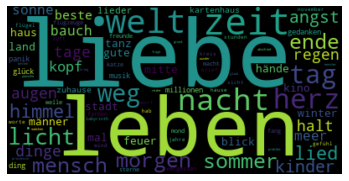

In [25]:
pop_nouns_text = ' '.join(pop_nouns).lower()

wordcloud = WordCloud(prefer_horizontal=2).generate(pop_nouns_text)
# docs.post_
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

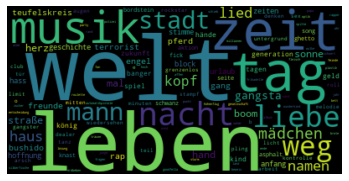

In [26]:
rap_nouns_text = ' '.join(rap_nouns).lower()

wordcloud = WordCloud(prefer_horizontal=2).generate(rap_nouns_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
# !pip install spacy_sentiws

In [15]:
from spacy_sentiws import spaCySentiWS
sentiws_path = '../data/sentiws'
nlp.add_pipe("sentiws", config={"sentiws_path": sentiws_path})

In [16]:
# positive_words = []
# negative_words = []

# for idx, row in df.iterrows():
#     text = row['lyrics']
#     doc = nlp(text)
#     for token in doc:
#         sentiment = token._.sentiws
#         if isinstance(sentiment, float):
#             if sentiment > 0:
#                 positive_words.append(token.text)
#             elif sentiment < 0:
#                 negative_words.append(token.text)

# df['positive_words'] = ', '.join(set(positive_words))
# df['negative_words'] = ', '.join(set(negative_words))

In [31]:
df['positive_words'] = ''
df['negative_words'] = ''

for idx, row in df.iterrows():
    text = row['lyrics']
    positive_words = []
    negative_words = []
    doc = nlp(text)
    for token in doc:
        sentiment = token._.sentiws
        if isinstance(sentiment, float):
            if sentiment > 0:
                positive_words.append(token.text)
            elif sentiment < 0:
                negative_words.append(token.text)
    df.at[idx, 'positive_words'] = ', '.join(set(positive_words))
    df.at[idx, 'negative_words'] = ', '.join(set(negative_words))

In [32]:
df

,Unnamed: 0,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics,weekday,word_count,positive_words,negative_words
0,0,Pop,Adel Tawil,Lieder,2013,Immer da,2010,256740,Immer da by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}",2013-11-08,"{'unreviewed_annotations': 0, 'hot': False}",Manchmal hast du gar nichts mehr Nur noch de...,Friday,60,"Liebe, helfe","kleinen, verurteilst, Angst"
1,1,Pop,Adel Tawil,Lieder,2013,Wenn Du liebst,2010,256742,Wenn du liebst by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}",2013-11-08,"{'unreviewed_annotations': 4, 'hot': False, 'p...",Ganz allein im schwarzen Licht wie hinter Gla...,Friday,100,"Vertrauen, Freunde, vergibst","weinen, fallen, betäubst"
2,2,Pop,Adel Tawil,Lieder,2013,Lieder,2010,236655,Lieder by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}",2013-11-08,"{'unreviewed_annotations': 0, 'hot': False, 'p...",Ich ging wie ein Ägypter Hab' mit Tauben gew...,Friday,145,wundervollen,"Ende, geweint, untergehen, Tränen, Verlierer"
3,3,Pop,Adel Tawil,Lieder,2013,Weinen,2010,256745,Weinen by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}",2013-11-08,"{'unreviewed_annotations': 0, 'hot': False, 'p...","Du warst die ganze Welt für mich Warst das, ...",Friday,69,"Liebe, verstehen, neuen",weinen
4,4,Pop,Adel Tawil,Lieder,2013,Unter Wasser,2010,256747,Unter Wasser by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}",2013-11-08,"{'unreviewed_annotations': 0, 'hot': False}","Keine Chance, es ist viel zu tief Keine Chan...",Friday,108,"Liebe, überleben","sinke, fehlt, Angst"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,4187,Schlager,Wolfgang Petry,Achterbahn,2001,Du hast mein Herz geklaut,2000,716319,Du hast mein Herz geklaut by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Die Luft ist raus - ich glaub nicht mehr an W...,NaN,53,Wunder,
4188,4188,Schlager,Wolfgang Petry,Achterbahn,2001,Leg dein Gesicht an mein Gesicht,2000,716326,Leg dein Gesicht an mein Gesicht by Wolfgang P...,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Du wolltest deine Freiheit haben Nun stehst d...,NaN,51,"Freiheit, Liebe, Sinn",
4189,4189,Schlager,Wolfgang Petry,Achterbahn,2001,Scheisse ist braun,2000,716331,Scheisse ist braun by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}","Wenn die Sonne untergeht in der Provinz, ho h...",NaN,94,Verstand,untergeht
4190,4190,Schlager,Wolfgang Petry,Kein Grund zur Panik,2003,Jetzt oder nie,2000,1447255,Mit offenen Armen by Wolfgang Petry,NaN,NaN,"{'unreviewed_annotations': 0, 'hot': False}",Wolfgang Petry - Anfang Vom Ende Lyrics Briefe...,NaN,50,Liebe,"gefehlt, Ende"


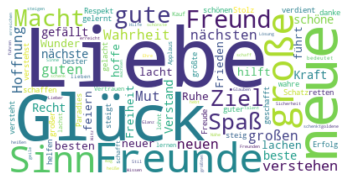

In [33]:
from wordcloud import WordCloud
positive_words = df['positive_words'].str.cat(sep=' ')
positive_word_list = positive_words.split(', ')

# Erzeuge eine Wordcloud mit den positiven Wörtern
wordcloud = WordCloud(background_color='white').generate(' '.join(positive_word_list))

# Zeige die Wordcloud an
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

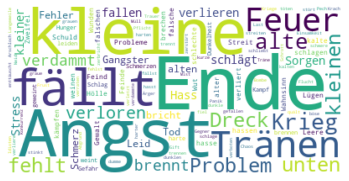

In [36]:
negative_words = df['negative_words'].str.cat(sep=' ')
negative_words_list = negative_words.split(', ')


wordcloud = WordCloud(background_color='white').generate(' '.join(negative_words_list))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [68]:
word_counts = {}
for word in positive_word_list:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

filtered_word_counts = {word: count for word, count in word_counts.items() if count >= 50}

words = list(filtered_word_counts.keys())
counts = list(filtered_word_counts.values())

fig = go.Figure(data=go.Scatter(
    x=words,
    y=counts,
    mode='markers',
    marker=dict(
        size=counts,
        sizemode='area',
        sizeref=max(counts) / 1000,
        color=counts,
        colorscale='thermal',
        showscale=True
    ),
))

fig.update_layout(
    title='Positive Words Bubble Chart (mindestens 50 Mal auftretende Wörter)',
    xaxis=dict(title='Words'),
    yaxis=dict(title='Counts'),
    showlegend=False
)

fig.show()


In [37]:
import plotly.graph_objects as go

genre_happiness = {}

for genre in df['genre'].unique():
    genre_lyrics = df[df['genre'] == genre]['lyrics']
    positive_words = []
    
    for lyrics in genre_lyrics:
        doc = nlp(lyrics)
        for token in doc:
            sentiment = token._.sentiws
            if isinstance(sentiment, float) and sentiment > 0:
                positive_words.append(token.text)
    
    genre_happiness[genre] = len(positive_words)

genres = list(genre_happiness.keys())
happiness_scores = list(genre_happiness.values())

fig = go.Figure(data=go.Scatter(
    x=genres,
    y=happiness_scores,
    mode='markers',
    marker=dict(
        size=happiness_scores,
        sizemode='area',
        sizeref=2 * max(happiness_scores) / (20**2),
        color=happiness_scores,
        colorscale='Blues',
        showscale=True
    ),
    text=genres
))

fig.update_layout(
    title='Happiness Scores by Genre',
    xaxis=dict(title='Genre'),
    yaxis=dict(title='Happiness Score'),
    showlegend=False
)

fig.show()



In [38]:
import plotly.express as px

genre_happiness = {}

for genre in df['genre'].unique():
    genre_lyrics = df[df['genre'] == genre]['lyrics']
    positive_words = []
    
    for lyrics in genre_lyrics:
        doc = nlp(lyrics)
        for token in doc:
            sentiment = token._.sentiws
            if isinstance(sentiment, float) and sentiment > 0:
                positive_words.append(token.text)
    
    genre_happiness[genre] = len(positive_words)

happiest_genre = max(genre_happiness, key=genre_happiness.get)
happiness_score = genre_happiness[happiest_genre]

data = pd.DataFrame({'Genre': list(genre_happiness.keys()), 'Happiness Score': list(genre_happiness.values())})


fig = px.pie(data, values='Happiness Score', names='Genre', title='Happiness Score by Genre')


fig.show()